# Кластеризация

Кластеризация (англ. cluster analysis) — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Задача кластеризации относится к классу задач обучения без учителя.

In [10]:
import pandas as pd

from matplotlib import pyplot as plt

import daal4py

Загрузка датасета

In [7]:
df = pd.read_csv('quake.dat', names=['focal_depth', 'latitude', 'longitude', 'richter'], skiprows=7).astype(float)
df

focal_depth  latitude  longitude  richter
0            33.0    -52.26      28.30      6.7
1            36.0     45.53     150.93      5.8
2            57.0     41.85     142.78      5.8
3            67.0     29.19     141.15      6.2
4            30.0    -21.66     169.81      6.0
...           ...       ...        ...      ...
2173         13.0     51.54    -173.11      5.8
2174         97.0    -10.16     161.01      5.9
2175        527.0     27.87     139.51      5.8
2176         51.0     36.43     140.98      6.0
2177         41.0     24.02     122.23      5.8

[2178 rows x 4 columns]

## K-means

Алгоритм k средних (англ. k-means) - один из алгоритмов машинного обучения, решающий задачу кластеризации. Этот алгоритм является неиерархическим, итерационным методом кластеризации, он получил большую популярность благодаря своей простоте, наглядности реализации и достаточно высокому качеству работы. Был изобретен в 1950-х годах математиком Гуго Штейнгаузом и почти одновременно Стюартом Ллойдом. Особую популярность приобрел после публикации работы МакКуина в 1967.

Основная идея алгоритма k-means заключается в том, что данные произвольно разбиваются на кластеры, после чего итеративно перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Цель алгоритма заключается в разделении n наблюдений на k кластеров таким образом, чтобы каждое наблюдение принадлежало ровно одному кластеру, расположенному на наименьшем расстоянии от наблюдения.

Кластеризация при помощи k-means

In [26]:
clusters = 5
result = daal4py.kmeans(nClusters=clusters, maxIterations=5, assignFlag=True).compute(
    df, daal4py.kmeans_init(nClusters=clusters, method='plusPlusDense').compute(df).centroids
)

print(f'Cluster centers: {result.centroids}')

Cluster centers: [[ 1.82744681e+02  6.73134752e+00  1.36614043e+02  5.99290780e+00
   1.13475177e-01]
 [ 5.12922636e+01  9.13157593e+00 -1.51673696e+02  5.99083095e+00
   1.13753582e+00]
 [ 3.87678143e+01  1.36083427e+01  1.31569359e+02  5.97453963e+00
   1.96637310e+00]
 [ 4.19940120e+01 -1.12382934e+01 -4.36051497e+01  5.97035928e+00
   2.97904192e+00]
 [ 5.31819048e+02 -3.62285714e-01  3.34289524e+01  5.96380952e+00
   4.00000000e+00]]


Добавление полученных кластеров в датасет

In [27]:
df['cluster'] = result.assignments.reshape(-1)
df

focal_depth  latitude  longitude  richter  cluster
0            33.0    -52.26      28.30      6.7        3
1            36.0     45.53     150.93      5.8        2
2            57.0     41.85     142.78      5.8        2
3            67.0     29.19     141.15      6.2        2
4            30.0    -21.66     169.81      6.0        2
...           ...       ...        ...      ...      ...
2173         13.0     51.54    -173.11      5.8        1
2174         97.0    -10.16     161.01      5.9        2
2175        527.0     27.87     139.51      5.8        4
2176         51.0     36.43     140.98      6.0        2
2177         41.0     24.02     122.23      5.8        2

[2178 rows x 5 columns]

Построения точечной диаграммы. Точки расставляются в пространстве долгота-широта, размер точек соответствует величине по шкале рихтера, цвет точки определяется кластером, к которому она принадлежит

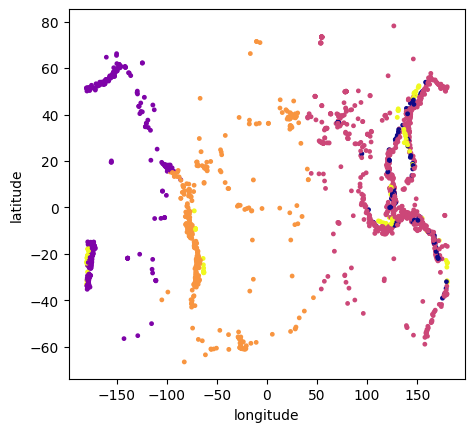

In [28]:
ax = df.plot.scatter(x='longitude', y='latitude', s=df.richter, c=df.cluster, colormap='plasma')
ax.figure.axes[1].remove()
plt.show()

## Метод EM

EM-алгоритм (англ. expectation-maximization) — это общий метод нахождения оценок функции правдоподобия в моделях со скрытыми переменными, который из смеси распределений позволяет строить (приближать) сложные вероятностные распределения.

Кластеризация при помощи EM. В daal4py алгоритм не назначает классы автоматически. Выводятся центры кластеров

In [29]:
df2 = df.drop('cluster', axis=1)

init = daal4py.em_gmm_init(nComponents=clusters).compute(df2)
result = daal4py.em_gmm(nComponents=clusters).compute(df2, init.weights, init.means, init.covariances)

print(f'Cluster centers: {result.means}')


Means: [[ 228.46636588  -19.99169555 -110.98756431    5.92075931]
 [ 219.33506926    8.19646389  136.18029723    6.05819982]
 [  51.29764753   -5.59016341  143.02157935    5.93931843]
 [  29.79526065    2.64395853  -74.08791706    6.01287351]
 [  28.2703201    39.81169546  118.26679018    5.95128304]]
